In [1]:
# we have lables already, so we will apply K means to the rest of the data and compare the grouping of the model with the actual labels

In [2]:
import pandas as pd

df = pd.read_csv("data-lab-5-hcv.csv")
display(df)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [5]:
df['ALB'] = df['ALB'].fillna(value=df['ALB'].median())
df['ALP'] = df['ALP'].fillna(value=df['ALP'].median())
df['ALT'] = df['ALT'].fillna(value=df['ALT'].median())
df['CHOL'] = df['CHOL'].fillna(value=df['CHOL'].median())
df['PROT'] = df['PROT'].fillna(value=df['PROT'].median())
# between mean and median, median is often preferred as it's less sensitive to outliers
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [8]:
# check outliers
for column in ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - (1.5 * IQR)

    list = [i for i in df[column] if i < lower_bound or i > upper_bound]
    print(f"{column}: {len(list)}, {list}")

# all of them are indeed normal values

Age: 1, [77]
ALB: 27, [29.0, 27.8, 55.4, 82.2, 28.1, 59.7, 27.8, 62.9, 59.8, 26.2, 27.3, 26.3, 27.8, 22.5, 24.9, 21.6, 14.9, 20.3, 19.3, 29.0, 20.0, 27.0, 23.0, 27.0, 23.0, 24.0, 29.0]
ALP: 14, [118.9, 126.0, 145.0, 119.7, 137.2, 120.2, 136.9, 124.0, 208.2, 137.8, 11.3, 143.1, 190.7, 416.6]
ALT: 36, [97.8, 103.6, 91.7, 96.1, 71.7, 65.9, 87.9, 59.8, 118.1, 70.8, 60.3, 67.5, 59.1, 87.5, 66.9, 60.4, 64.3, 75.2, 62.1, 79.5, 208.8, 325.3, 87.0, 63.3, 66.0, 118.0, 114.0, 258.0, 130.0, 67.1, 164.0, 114.0, 94.0, 62.0, 159.0, 100.0]
AST: 64, [52.6, 56.2, 60.6, 50.0, 188.7, 52.6, 52.6, 52.3, 69.2, 77.2, 130.6, 95.2, 146.6, 67.0, 164.2, 187.7, 96.2, 60.9, 53.5, 77.6, 132.8, 324.0, 63.2, 114.4, 83.5, 114.7, 125.0, 69.1, 62.0, 75.0, 106.0, 187.9, 55.9, 74.5, 90.0, 161.9, 68.9, 70.0, 125.0, 60.0, 60.2, 263.1, 101.9, 113.0, 102.0, 185.0, 66.6, 319.8, 123.0, 80.3, 181.8, 110.1, 65.2, 95.4, 143.2, 54.0, 90.4, 55.7, 150.0, 285.8, 110.3, 99.0, 62.0, 80.0]
BIL: 47, [35.2, 24.9, 23.4, 23.1, 45.1, 41.9, 23.

In [9]:
numeric_columns = df.select_dtypes(include=['number'])
cat_column = df.select_dtypes(include=['category', 'object'])  # in here they are just objects indeed
display(numeric_columns.head())
display(cat_column.head())

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


,Category,Sex
0,0=Blood Donor,m
1,0=Blood Donor,m
2,0=Blood Donor,m
3,0=Blood Donor,m
4,0=Blood Donor,m


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

features = df.drop('Category', axis=1)

target = df['Category']
encoder = LabelEncoder()
target = encoder.fit_transform(target)

# first pipe line for features to preprocess data
# we usually don't include the target variable in the transformer.
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), features.select_dtypes(include=['number']).columns),
    # don't know why but MinMaxScaler gives me a better silhouette_score the StandardScaler()
    # we add ".columns" because features.select_dtypes() returns a DataFrame, but ColumnTransformer expects column names or indices, not DataFrames.
    ('cat', OneHotEncoder(), features.select_dtypes(include=['object']).columns)  # OneHotEncoder() from scikit-learn and pd.get_dummies() from pandas are functionally similar
])

In [11]:
# to check the ColumnTransformer effect on the dataframe
transformed_features = preprocessor.fit_transform(features)

# Get feature names - works because preprocessor is now fitted
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame with proper column names
transformed_df = pd.DataFrame(
    transformed_features,
    columns=feature_names
)

transformed_df

,num__Age,num__ALB,num__ALP,num__ALT,num__AST,num__BIL,num__CHE,num__CHOL,num__CREA,num__GGT,num__PROT,cat__Sex_f,cat__Sex_m
0,0.224138,0.350669,0.101653,0.020962,0.036694,0.026461,0.367578,0.218447,0.091495,0.011757,0.535398,0.0,1.0
1,0.224138,0.350669,0.145571,0.052713,0.044990,0.012243,0.650434,0.408981,0.061619,0.017172,0.701327,0.0,1.0
2,0.224138,0.475483,0.156427,0.108816,0.134014,0.020932,0.494997,0.457524,0.072822,0.044400,0.763274,0.0,1.0
3,0.224138,0.420505,0.100419,0.091554,0.038290,0.071485,0.394263,0.401699,0.067221,0.045328,0.683628,0.0,1.0
4,0.224138,0.361070,0.154947,0.097719,0.045310,0.034755,0.515677,0.350728,0.063486,0.039295,0.528761,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0.741379,0.254086,1.000000,0.015413,0.318124,0.194313,0.276851,0.591019,0.044534,1.000000,0.524336,1.0,0.0
611,0.775862,0.135215,0.225759,0.006165,0.107849,0.075829,0.008005,0.192961,0.051349,0.048577,0.586283,1.0,0.0
612,0.775862,0.209510,0.187515,0.008015,0.282068,0.186414,0.016011,0.266990,0.054803,0.092358,0.823009,1.0,0.0
613,0.465517,0.268945,0.135455,0.117448,0.164008,0.075829,0.142762,0.336165,0.041079,0.070390,0.579646,1.0,0.0


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2, random_state=42))  # check notes for n_compnents
])

In [13]:
# to find the cluster number
# in fact in most real-world K-means applications, we don't know the optimal number of clusters in advance. K-means is an unsupervised learning method

target_classes = encoder.classes_ # array of unique classes in your 'Category' column
# note that the "classes_" attribute belongs to the encoder object, we can't use it for an np array like target
# we also can not use it with LabelEncoder(), that is why we define a separate variable for it
print(target_classes)

n_clusters = len(target_classes)
print(n_clusters)


['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
5


In [14]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=n_clusters,
                      init='k-means++',
                      n_init=50,
                      max_iter=500,
                      random_state=42)

In [15]:
pipe = Pipeline([
    ('preprocessing_pipeline', preprocessing_pipeline),
    ('kmeans_model', kmeans_model)
])

pipe.fit(features)

Pipeline(steps=[('preprocessing_pipeline',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   MinMaxScaler(),
                                                                   Index(['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT',
       'PROT'],
      dtype='object')),
                                                                  ('cat',
                                                                   OneHotEncoder(),
                                                                   Index(['Sex'], dtype='object'))])),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('kmeans_model',
                 KMeans(max_iter=500, n_clusters=5, n_init=50,
                        random_state=42))])

In [16]:
# get silhouette score
from sklearn.metrics import silhouette_score

preprocessed_data = pipe['preprocessing_pipeline'].transform(features)
predicted_labels = pipe['kmeans_model'].labels_  # gives me a numpy array of the labels

silhouette_score(preprocessed_data, predicted_labels)

0.5668100227567866

In [17]:
features['predicted_labels'] = predicted_labels
features

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,predicted_labels
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,3
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,3
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,3
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,4
611,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,4
612,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,4
613,46,f,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,4


<function matplotlib.pyplot.show(close=None, block=None)>

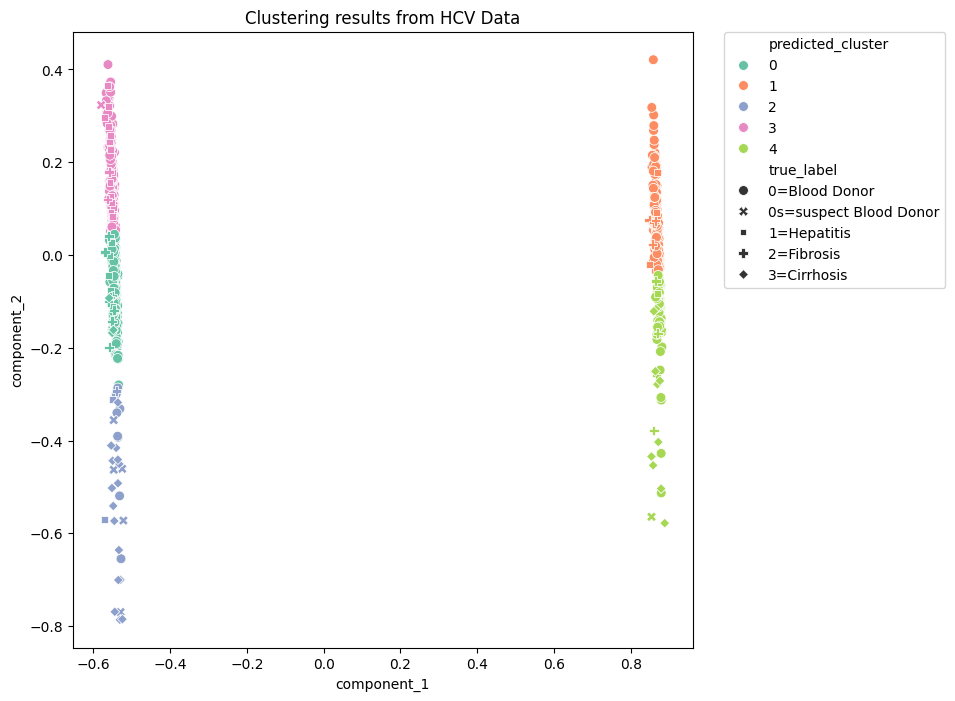

In [23]:
# compare labels of the model with actual labels

import matplotlib.pyplot as plt
import seaborn as sns

pcadf = pd.DataFrame(
    preprocessed_data,
    columns=['component_1', 'component_2']  # we just need that two columns of the PCA (n_components=2)
)

pcadf["predicted_cluster"] = predicted_labels
pcadf["true_label"] = encoder.inverse_transform(target)  # to get the main categorical variables

plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x='component_1',
    y='component_2',
    s=50,
    data=pcadf,
    hue='predicted_cluster',
    style='true_label',
    palette='Set2'
)

scat.set_title("Clustering results from HCV Data")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show